<a href="https://colab.research.google.com/github/alihussainia/AI-Makerspace/blob/test/Ali/PyCaret-Classification/LoanClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [ ]:
# fetch requirements.txt file 
!wget -q "https://raw.githubusercontent.com/DigitalProductschool/AI-Makerspace/test/Ali/PyCaret-Classification/requirements.txt"

In [ ]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

!pip install -q -r requirements.txt

In [ ]:
# to allow local port to be tunneled 
!npm install -g --silent localtunnel

# Imports

In [ ]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# we only need pandas and pycaret
import pandas as pd
from pycaret.classification import *

# to allow interactive charts to shown in colab
from pycaret.utils import enable_colab
enable_colab()

# Dataset


Reference: https://www.kaggle.com/sriharipramod/bank-loan-classification

In [ ]:
# fetch dataset 
!wget -q "https://raw.githubusercontent.com/DigitalProductschool/AI-Makerspace/test/Ali/PyCaret-Classification/UniversalBank.csv"

In [ ]:
# reading dataset
dataset = pd.read_csv("UniversalBank.csv")

In [ ]:
# removing spaces in col names
dataset.columns = [i.replace(" ", "") for i in dataset.columns]

In [ ]:
# drop columns which are not significant
dataset.drop(["ID","ZIPCode"],axis=1,inplace=True)

In [ ]:
# definign categorical features
cat_cols = ["Family","Education","SecuritiesAccount","CDAccount","Online","CreditCard"] 

In [ ]:
# defining train and test datasets
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4500, 12)
Unseen Data For Predictions: (500, 12)


# Model

Reference: https://pycaret.org/classification1/

### [`setup`](https://pycaret.org/classification1/#setup)
This function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

In [ ]:
# initializing the env
exp_mclf101 = setup(data = data, 
                    session_id=123, 
                    target = 'PersonalLoan', 
                    categorical_features=cat_cols,
                    normalize=True, 
                    normalize_method='minmax',
                    transformation=True,
                    use_gpu=True,
                    log_experiment=True,
                    experiment_name='loan1',
                    silent=True) 

### [`compare_models`](https://pycaret.org/classification1/#compare-models)
This function uses all models in the model library and scores them using Stratified Cross Validation.

In [ ]:
# let's compare 10+ models to find the best match
best = compare_models()

In [ ]:
# have a look at the best model i.e. Random Forest Classifier
print(best)

### [`create_model`](https://pycaret.org/classification1/#create-model)
This function creates a model and scores it using Stratified Cross Validation.

In [ ]:
# Let's pick the model
rf = create_model('rf', fold = 5, round=4) # model code, cv fold, and rounding upto _ places.

In [ ]:
print(rf)

### [`tune_model`](https://pycaret.org/classification1/#tune-model)
This function tunes the hyperparameters of a model and scores it using Stratified Cross Validation.

In [ ]:
tuned_rf = tune_model(rf, optimize = 'AUC') # Optimize - Measure used to select the best model through hyperparameter tuning.

### [`plot_model`](https://pycaret.org/classification1/#plot-model)
This function takes a trained model object and returns a plot based on the test / hold-out set.

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

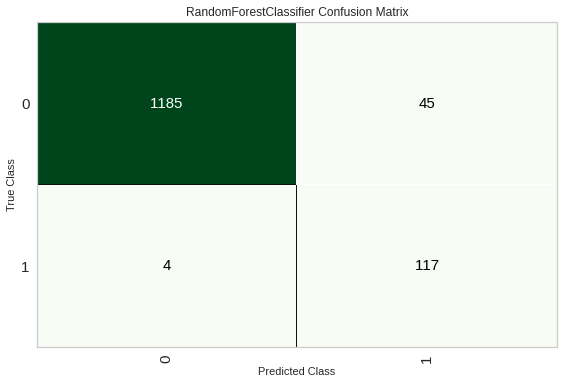

In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

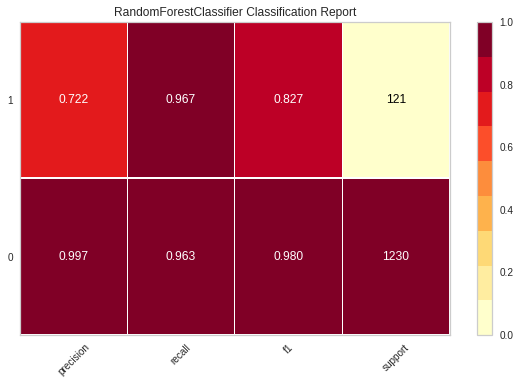

In [ ]:
plot_model(tuned_rf, plot = 'class_report')

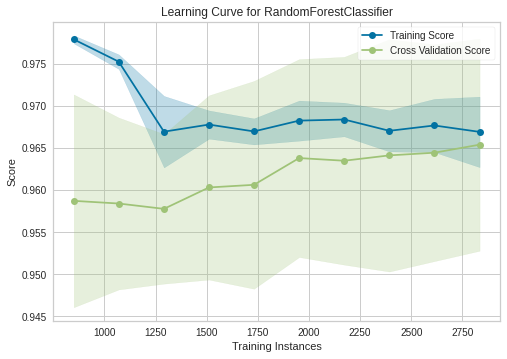

In [ ]:
plot_model(tuned_rf,plot="learning") # takes time

### [`evaluate_model`](https://pycaret.org/classification1/#evaluate-model)
This function displays a user interface for all of the available plots for a given estimator. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_rf)

### [`predict_model`](https://pycaret.org/classification1/#predict-model)
This function is used to predict new data using a trained estimator.

In [ ]:
predict_model(tuned_rf);

### [`finalize_model`](https://pycaret.org/classification1/#finalize-model)
This function fits the estimator onto the complete dataset passed during the setup() stage.

In [ ]:
final_rf = finalize_model(tuned_rf)

In [ ]:
print(final_rf)

In [ ]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

### [`save_model`](https://pycaret.org/classification1/#save-model)
This function saves the transformation pipeline and trained model object into the current active directory as a pickle file for later use.

In [ ]:
save_model(final_rf,'RF_Model_V1')

### [`load_mode`](https://pycaret.org/classification1/#load-model)
This function loads a previously saved transformation pipeline and model from the current active directory into the current python environment. Load object must be a pickle file.

In [ ]:
saved_final_rf = load_model('RF_Model_V1')

In [ ]:
new_prediction = predict_model(saved_final_rf, data=data_unseen) # use cmd+R and then enter c:/users/owner/pycaret/ # , drift_report=True

In [ ]:
new_prediction.head() # both above one and this is identical

# Cool Features

### `convert_model`


Convert Model into different Language
* 'python'
* 'java'
* 'javascript'
* 'c'
* 'c#'
* 'f#'
* 'go'
* 'haskell'
* 'php'
* 'powershell'
* 'r'
* 'ruby'
* 'vb'
* 'dart'

In [ ]:
import sys
sys.setrecursionlimit(2000)

convert_model(final_rf, 'go') # requires sklearn pipeline

### `dashboard`
This function will create a model explainer dashboard.

In [ ]:
pycaret.classification.dashboard(final_rf, display_format='inline') # this will create an inline dashboard

In [ ]:
pycaret.classification.dashboard(final_rf, display_format='dash', run_kwargs={'port':7000})

In [ ]:
!npx localtunnel --port 7000

### `create_api`
This function will create a fastAPI instance.

In [ ]:
create_api(saved_final_rf, 'api')

In [ ]:
!python api.py  & npx localtunnel --port 8000 # append /docs in the url

### `create_docker`
This function will create a DockerFile of the API.

In [ ]:
create_docker('api')

### `check_fairness`
This will allow to check model fairness with respect to a feature(s).

In [ ]:
#check_fairness(final_lr ['Age']) # fairness with R/O Age.
check_fairness(final_rf, ['Age','Income']) # BEWARE: Time Taking

### `mlflow ui`

In [ ]:
# to start the MLFlow server from notebook:
!mlflow ui & npx localtunnel --port 5000

# Streamlit 

In [ ]:
!wget -q "https://raw.githubusercontent.com/DigitalProductschool/AI-Makerspace/test/Ali/PyCaret-Classification/streamlit_app.py"

In [ ]:
!streamlit run streamlit_app.py & npx localtunnel --port 8501